<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/Association_Rule_Learning_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apriori

People who 'a' also bought 'b'.

Potential Rules 
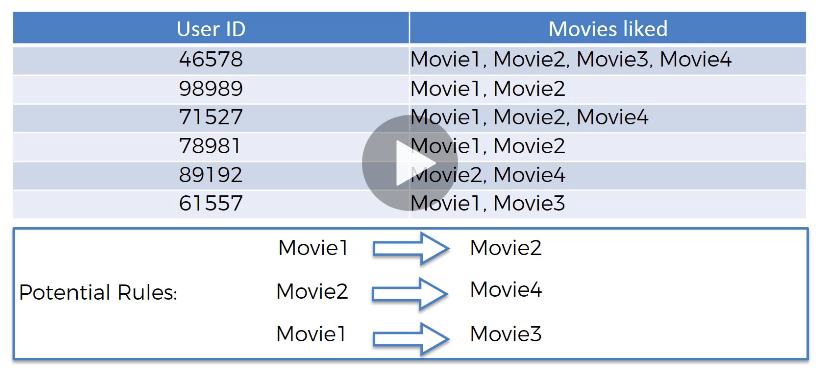

Support
This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

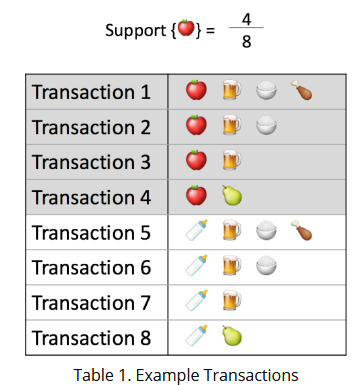

Confidence:
This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

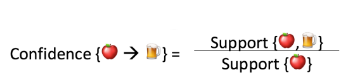

One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

Lift:
 This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

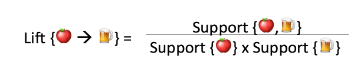

[More on Apriori](https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html)



###Apriori Algorithm

```
Step 1: Set a minimum support and confidence

Step 2: Take all the subsets in transactions having higher support than minimum support

Step 3: Take all the rules of these subsets having higher confidence than minimum cinfidence

Step 4: Sort by rules in decreasing lift
```

E.g. of use
Recommender System


##Very Useful for a Data Scientist in retail or e-commerce company

Apriori is used for market basket analysis.

##Importing Libraries

In [3]:
#google colab doesnt include
# apriori in python == apyori
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=aac5573a44f376ffa2d5623f18123a88601b2572f2e6410dfbcd0a8e7a3eb0d3
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [1]:
#Each row corresponds to different transactions
#Each column corresponds to the cutomer bought
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [8]:
#We dont want to include header or name sof columns
#because it contains information about the customer transactions
#which we dont require
df = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
#But this format is not quite the format we need for apriori
#We want to have a transaction list one by one for the customer
transactions = []#we populate it with a for loop
for i in range(0,7501):#This for loop for going to all rows
  transactions.append([str(df.values[i,j]) for j in range(0,20)])
  #second for loop to access the column values we need in a list
  #df.values because we have to access values in the cells
  #all the values inside the cell must be strings
  

##Training the Apriori model on the dataset

[apyori apriori documentation](https://zaxrosenberg.com/unofficial-apyori-documentation/)

min_support = (number of transactions per day * in a week)/total number of trnasations

we take 3 as number of trsactions per day
min_support = (3*7)/7501
min=support = 0.002799
min_support = 0.003

min_confidence in R is by default 0.8 but here when 0.8 was tried there were too few rules.

Same for 0.4. So, we choose 0.2

min_lift gererally 3 or 4 are good lifts.

min_length is minimum number of items we want to have in our rules.

max_length is maximum number of items we want to have in our rules.


because we want to find 

buy one product and get one product for free.

therefore, we chose 2 as min_length and max_length

if we want to set buy two products and get 10 for free

we set min_length = 2, max_length = 10

In [17]:
from apyori import apriori
rules = apriori(transactions=transactions,
                min_support=0.003,
                min_confidence = 0.2,
                min_lift = 3,
                min_lenght = 2,
                max_lenght = 2)

##Visualizing the results

In [18]:
results = list(rules)
results
#This is good but we need to see results in a better way

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

##Putting the results well-organized into a Pandas Dataframe

In [19]:
#This is going to be encountered once in a lifetime
#use it for future purposes
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

##Displaying the results non-sorted

In [20]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
...,...,...,...,...,...
155,ground beef,nan,0.003066,0.216981,3.632981
156,pancakes,nan,0.003066,0.211009,3.532991
157,ground beef,nan,0.003066,0.261364,4.376091
158,milk,nan,0.003333,0.211864,3.223519


##Displaying the results in sorted by decreasing lifts

In [22]:
resultsinDataFrame.nlargest(n=20, columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
97,frozen vegetables,milk,0.003066,0.383333,7.987176
150,frozen vegetables,milk,0.003066,0.383333,7.987176
96,frozen vegetables,milk,0.003333,0.294118,6.128268
149,frozen vegetables,milk,0.003333,0.294118,6.128268
132,whole wheat pasta,nan,0.003866,0.402778,6.128268
59,whole wheat pasta,olive oil,0.003866,0.402778,6.115863
50,tomato sauce,spaghetti,0.003066,0.216981,5.535971
122,tomato sauce,nan,0.003066,0.216981,5.535971
28,fromage blanc,nan,0.003333,0.245098,5.178818
3,fromage blanc,honey,0.003333,0.245098,5.164271
